In [81]:
# Imports

# Data tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# scikit learn processing tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score

# scitkit learn models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# from xgboost.sklearn.XGBModel import XGBClassifier
from xgboost import XGBClassifier

# scikit learn metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# Imbalanced Learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline

# misc
from pprint import pprint

In [2]:
# Set options
pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
# Binary confusion matrices are consturcted as follows:
# [[tn, fp],
#  [fn, tp]]

In [4]:
def print_scores(estimator, estimator_title, xtr, xtst, ytr, ytst):
    print('{} Score train:'.format(estimator_title), estimator.score(xtr, ytr))
    print('{} Score test:'.format(estimator_title), estimator.score(xtst, ytst))
    print(classification_report(ytst, estimator.predict(xtst)))

In [56]:
# Read in data set
tc = pd.read_csv('../data/processed/telecom_churn_cleaned.csv')
tc.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510,churn
0,128,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,107,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,137,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,84,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,75,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [57]:
tc.describe()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.015602,0.024002,0.016502,0.019202,0.010201,0.019802,0.022202,0.016202,0.018302,0.018902,0.016202,0.015902,0.013201,0.021902,0.017402,0.021302,0.021002,0.017702,0.015302,0.019502,0.021002,0.018602,0.021902,0.025203,0.018902,0.019502,0.020402,0.020402,0.018602,0.018302,0.016802,0.020402,0.018602,0.019802,0.024902,0.023402,0.018302,0.023402,0.013501,0.019502,0.018002,0.018002,0.015902,0.021602,0.021602,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102,0.251425,0.496550,0.252025,0.144914
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.123947,0.153079,0.127414,0.137255,0.100499,0.139340,0.147363,0.126269,0.134061,0.136199,0.126269,0.125114,0.114153,0.146386,0.130782,0.144411,0.143413,0.131885,0.122768,0.138302,0.143413,0.135134,0.146386,0.156763,0.136199,0.138302,0.141392,0.141392,0.135134,0.134061,0.128547,0.141392,0.135134,0.139340,0.155851,0.151200,0.134061,0.151200,0.115426,0.138302,0.132978,0.132978,0.125114,0.145402,0.145402,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251,0.433897,0.500063,0.434241,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50

In [58]:
tc = tc.drop('CA', axis=1)
tc.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,AK,AL,AR,AZ,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510,churn
0,128,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,107,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,137,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,84,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,75,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [59]:
# Set up train/test split, create some extra copies to investigate scaling
y_orig = tc['churn'].values.copy()
X_orig = tc.drop('churn', axis=1).copy()
X, X_holdout, y, y_holdout = train_test_split(X_orig, y_orig, test_size=0.2,
                                                          random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                          random_state=42, shuffle=True)
X_train.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,AK,AL,AR,AZ,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510
42,34,0.0,0.0,0,124.8,82,21.22,282.2,98,23.99,311.5,78,14.02,10.0,4,2.70,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1166,72,0.0,0.0,0,118.2,106,20.09,167.2,136,14.21,214.2,106,9.64,12.2,3,3.29,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1895,86,0.0,1.0,21,197.9,99,33.64,165.6,100,14.08,208.0,120,9.36,10.1,9,2.73,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1083,82,1.0,0.0,0,208.8,101,35.50,213.7,87,18.16,175.1,86,7.88,12.4,6,3.35,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
129,131,0.0,1.0,36,214.2,115,36.41,161.7,117,13.74,264.7,102,11.91,9.5,4,2.57,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Steps to test for each model
1. StandardScaler fit/predict
2. Variations on hyperparameters
3. Balanced dataset fit predict (Random/Smote/Adyson)
4. Variations on hypterparameters with balanced data

In [9]:
steps = [('scaler', StandardScaler()),
         ('LR', LogisticRegression(solver='lbfgs', max_iter=1000))]

pipeline = Pipeline(steps)

parameters = {'LR__C' : [12000, 11000, 10000, 9000, 8000]}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(cv.score(X_test, y_test)))
print("Accuracy Test: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy Train: 0.8726591760299626
Accuracy Test: 0.8726591760299626
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       453
           1       0.65      0.35      0.45        81

    accuracy                           0.87       534
   macro avg       0.77      0.66      0.69       534
weighted avg       0.86      0.87      0.86       534

Tuned Model Parameters: {'LR__C': 12000}


#### Logistic Regression continually gets the best score at C=10000. Using C=10000 for further testing.  
#### Next step is try over sampling with Logistic Regression.

In [10]:
# Use Random Oversamping to see if score improves
steps = [('OR', RandomOverSampler(sampling_strategy='minority',random_state=42)),
         ('scaler', StandardScaler()),
         ('LR', LogisticRegression(solver='lbfgs', C=10000, max_iter=1000))]

lr_pipe = Pipeline(steps)

cross_val_score(lr_pipe, X_train, y_train, cv=5, n_jobs=-1)

# lr_pipe.fit(X, y)
# y_pred = lr_pipe.predict(X_test)

# # Compute and print metrics
# print("Accuracy Train: {}".format(lr_pipe.score(X_test, y_test)))
# print("Accuracy Test: {}".format(lr_pipe.score(X_test, y_test)))
# print(classification_report(y_test, y_pred))

array([0.77102804, 0.72535211, 0.76525822, 0.74882629, 0.74882629])

#### Random Oversampling decreased score. Trying ADASYN.

In [11]:
# Use Adasyn Oversamping to see if score improves
steps = [('ADASYN', ADASYN(sampling_strategy='minority', random_state=42)),
         ('scaler', StandardScaler()),
         ('LR', LogisticRegression(solver='lbfgs', C=10000, max_iter=1000))]

lr_pipe = Pipeline(steps)
cross_val_score(lr_pipe, X_train, y_train, cv=5, n_jobs=-1)

# lr_pipe.fit(X, y)
# y_pred = lr_pipe.predict(X_test)

# # Compute and print metrics
# print("Accuracy Train: {}".format(lr_pipe.score(X_test, y_test)))
# print("Accuracy Test: {}".format(lr_pipe.score(X_test, y_test)))
# print(classification_report(y_test, y_pred))

array([0.77803738, 0.74413146, 0.76760563, 0.75117371, 0.75821596])

#### ADASYN performed worse on average than Random Oversampling.  
#### Trying SMOTE.

In [12]:
# Use SMOTE Oversamping to see if score improves
steps = [('SMOTE', SMOTE(sampling_strategy='minority', random_state=42)),
         ('scaler', StandardScaler()),
         ('LR', LogisticRegression(solver='lbfgs', C=10000, max_iter=1000))]

lr_pipe = Pipeline(steps)
cross_val_score(lr_pipe, X_train, y_train, cv=5, n_jobs=-1)

# lr_pipe.fit(X, y)
# y_pred = lr_pipe.predict(X_test)

# # Compute and print metrics
# print("Accuracy Train: {}".format(lr_pipe.score(X_test, y_test)))
# print("Accuracy Test: {}".format(lr_pipe.score(X_test, y_test)))
# print(classification_report(y_test, y_pred))

array([0.76635514, 0.74882629, 0.77934272, 0.76056338, 0.74413146])

#### SMOTE comes in between Random Oversampling and ADASYN.  
#### Trying SMOTENC

In [13]:
# This will create a list of indexes for feature (column) in the dataframe that is categorical.
X.AK.unique().shape[0]

categoricals = []
for idx, val in enumerate(X.columns):
    if X[val].unique().shape[0] == 2:
        categoricals.append(idx)
# categoricals

In [14]:
# Use SMOTENC Oversamping to see if score improves
steps = [('SMOTENC', SMOTENC(categoricals, sampling_strategy='minority', random_state=42)),
         ('scaler', StandardScaler()),
         ('LR', LogisticRegression(solver='lbfgs', C=10000, max_iter=1000))]

lr_pipe = Pipeline(steps)
cross_val_score(lr_pipe, X_train, y_train, cv=5, n_jobs=-1)

# lr_pipe.fit(X, y)
# y_pred = lr_pipe.predict(X_test)

# # Compute and print metrics
# print("Accuracy Train: {}".format(lr_pipe.score(X_test, y_test)))
# print("Accuracy Test: {}".format(lr_pipe.score(X_test, y_test)))
# print(classification_report(y_test, y_pred))

array([0.86682243, 0.87323944, 0.85915493, 0.85211268, 0.85680751])

### Performance of Logistic Regression is best without oversampling.  
### Start testing with Naive Bayes

In [15]:


steps = [('scaler', StandardScaler()),
         ('NB', GaussianNB())]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.5861423220973783
Accuracy Test: 0.5861423220973783
              precision    recall  f1-score   support

           0       0.89      0.58      0.71       453
           1       0.20      0.59      0.30        81

    accuracy                           0.59       534
   macro avg       0.55      0.59      0.50       534
weighted avg       0.79      0.59      0.64       534



In [16]:
# Use Random Oversamping to see if score improves
steps = [('OR', RandomOverSampler(sampling_strategy='minority',random_state=42)),
         ('scaler', StandardScaler()),
         ('NB', GaussianNB())]

nb_pipe = Pipeline(steps)

cross_val_score(nb_pipe, X_train, y_train, cv=5, n_jobs=-1)

array([0.54672897, 0.51877934, 0.40140845, 0.38028169, 0.43192488])

In [17]:
def get_categoricals(frame):
    categoricals = []
    for idx, val in enumerate(frame.columns):
        if frame[val].nunique() == 2:
            categoricals.append(idx)
    return categoricals
# get_categoricals(X_train)

In [18]:
def get_discrete_cont(frame, labels=True):
    discrete_cont = []
    for idx, val in enumerate(frame.columns):
        if frame[val].nunique() > 50:
            if labels:
                discrete_cont.append(val)
            else:
                discrete_cont.append(idx)
    return discrete_cont
# get_discrete_cont(X_train, True)

In [19]:
def apply_cut(frame, cuts=25, labels=False):
    new_frame = frame.copy()
    discrete_cont = get_discrete_cont(frame, labels=True)
    for val in discrete_cont:
        new_frame[val] = pd.qcut(new_frame[val], cuts, labels=labels)
    return new_frame
# apply_qcut(X_train).head(3)

In [20]:
C = apply_cut(X)
C_train, C_test, d_train, d_test = train_test_split(C, y)
C.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,perc_churn,AK,AL,AR,AZ,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510
817,7,0.0,1.0,17,10,18,10,20,8,20,14,18,14,8,2,8,1,0.068182,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1373,9,0.0,0.0,0,12,22,12,24,8,24,9,20,9,4,3,4,1,0.136364,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
679,20,0.0,0.0,0,9,18,9,19,13,19,18,21,18,16,4,16,1,0.126761,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
56,24,0.0,0.0,0,5,10,5,10,20,10,3,5,3,6,6,6,1,0.185714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1993,24,0.0,0.0,0,16,24,16,4,9,4,10,3,10,23,5,23,3,0.242857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [21]:
steps = [('NB', MultinomialNB())]

pipeline = Pipeline(steps)
pipeline.fit(C_train, d_train)

# Predict the labels of the test set: y_pred
d_pred = pipeline.predict(C_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(C_test, d_test)))
print("Accuracy Test: {}".format(pipeline.score(C_test, d_test)))
print(classification_report(d_test, d_pred))

Accuracy Train: 0.5547226386806596
Accuracy Test: 0.5547226386806596
              precision    recall  f1-score   support

           0       0.89      0.54      0.67       566
           1       0.19      0.61      0.29       101

    accuracy                           0.55       667
   macro avg       0.54      0.58      0.48       667
weighted avg       0.78      0.55      0.62       667



In [22]:
steps = [('OR', RandomOverSampler(sampling_strategy='minority',random_state=42)),
         ('NB', MultinomialNB())]

pipeline = Pipeline(steps)
pipeline.fit(C_train, d_train)

# Predict the labels of the test set: y_pred
d_pred = pipeline.predict(C_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(C_test, d_test)))
print("Accuracy Test: {}".format(pipeline.score(C_test, d_test)))
print(classification_report(d_test, d_pred))

Accuracy Train: 0.48575712143928035
Accuracy Test: 0.48575712143928035
              precision    recall  f1-score   support

           0       0.89      0.45      0.60       566
           1       0.18      0.69      0.29       101

    accuracy                           0.49       667
   macro avg       0.54      0.57      0.44       667
weighted avg       0.78      0.49      0.55       667



In [23]:
steps = [('ADASYN', ADASYN(sampling_strategy='minority', random_state=42)),
         ('NB', MultinomialNB())]

pipeline = Pipeline(steps)
pipeline.fit(C_train, d_train)

# Predict the labels of the test set: y_pred
d_pred = pipeline.predict(C_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(C_test, d_test)))
print("Accuracy Test: {}".format(pipeline.score(C_test, d_test)))
print(classification_report(d_test, d_pred))

Accuracy Train: 0.47976011994003
Accuracy Test: 0.47976011994003
              precision    recall  f1-score   support

           0       0.90      0.43      0.59       566
           1       0.19      0.73      0.30       101

    accuracy                           0.48       667
   macro avg       0.54      0.58      0.44       667
weighted avg       0.79      0.48      0.54       667



In [24]:
steps = [('SMOTE', SMOTE(sampling_strategy='minority', random_state=42)),
         ('NB', MultinomialNB())]

pipeline = Pipeline(steps)
pipeline.fit(C_train, d_train)

# Predict the labels of the test set: y_pred
d_pred = pipeline.predict(C_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(C_test, d_test)))
print("Accuracy Test: {}".format(pipeline.score(C_test, d_test)))
print(classification_report(d_test, d_pred))

Accuracy Train: 0.4752623688155922
Accuracy Test: 0.4752623688155922
              precision    recall  f1-score   support

           0       0.89      0.43      0.58       566
           1       0.18      0.71      0.29       101

    accuracy                           0.48       667
   macro avg       0.54      0.57      0.44       667
weighted avg       0.79      0.48      0.54       667



In [25]:
categoricals = list(range(0, len(C_train.columns)))

In [26]:
(C_train.shape, d_train.shape)

((1999, 71), (1999,))

In [27]:
steps = [('SMOTENC', SMOTENC(categoricals[1:], sampling_strategy='minority', random_state=42)),
         ('NB', MultinomialNB())]

pipeline = Pipeline(steps)
pipeline.fit(C_train, d_train)

# Predict the labels of the test set: y_pred
d_pred = pipeline.predict(C_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(C_test, d_test)))
print("Accuracy Test: {}".format(pipeline.score(C_test, d_test)))
print(classification_report(d_test, d_pred))

Accuracy Train: 0.46776611694152925
Accuracy Test: 0.46776611694152925
              precision    recall  f1-score   support

           0       0.87      0.44      0.58       566
           1       0.17      0.62      0.26       101

    accuracy                           0.47       667
   macro avg       0.52      0.53      0.42       667
weighted avg       0.76      0.47      0.54       667



### Support Vector Classifiers unbalanced and balanced

In [28]:
svc = SVC(kernel='linear', class_weight='balanced')
_ = svc.fit(X_train, y_train)

In [29]:
# steps = [('scaler', StandardScaler()),
#          ('SVC', SVC(kernel='linear', class_weight='balanced'))]
steps = [('scaler', StandardScaler()),
         ('SVC', SVC())]

pipeline = Pipeline(steps)

parameters = [{'SVC__C' : [1, 10, 100, 1000],
              'SVC__kernel' : ['rbf'],
              'SVC__gamma': [1e-3, 1e-4]},
              {'SVC__C' : [1, 10, 100, 1000],
              'SVC__kernel' : ['linear']}]

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5, n_jobs=-1)
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(cv.score(X_test, y_test)))
print("Accuracy Test: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy Train: 0.8895131086142322
Accuracy Test: 0.8895131086142322
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       453
           1       0.75      0.41      0.53        81

    accuracy                           0.89       534
   macro avg       0.83      0.69      0.73       534
weighted avg       0.88      0.89      0.88       534

Tuned Model Parameters: {'SVC__C': 100, 'SVC__gamma': 0.001, 'SVC__kernel': 'rbf'}


### SVC with oversampled datasets

In [30]:
steps = [('OR', RandomOverSampler(sampling_strategy='minority',random_state=42)),
         ('scaler', StandardScaler()),
         ('SVC', SVC(C=100, gamma=0.001, kernel='rbf'))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.8295880149812734
Accuracy Test: 0.8295880149812734
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       453
           1       0.46      0.68      0.55        81

    accuracy                           0.83       534
   macro avg       0.70      0.77      0.72       534
weighted avg       0.86      0.83      0.84       534



In [31]:
steps = [('SMOTE', SMOTE(sampling_strategy='minority', random_state=42)),
         ('scaler', StandardScaler()),
         ('SVC', SVC(C=100, gamma=0.001, kernel='rbf'))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.8614232209737828
Accuracy Test: 0.8614232209737828
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       453
           1       0.55      0.51      0.53        81

    accuracy                           0.86       534
   macro avg       0.73      0.72      0.72       534
weighted avg       0.86      0.86      0.86       534



In [32]:
categoricals = get_categoricals(X_train)

steps = [('SMOTENC', SMOTENC(categoricals, sampling_strategy='minority', random_state=42)),
         ('scaler', StandardScaler()),
         ('SVC', SVC(C=100, gamma=0.001, kernel='rbf'))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.8689138576779026
Accuracy Test: 0.8689138576779026
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       453
           1       0.61      0.38      0.47        81

    accuracy                           0.87       534
   macro avg       0.75      0.67      0.70       534
weighted avg       0.85      0.87      0.86       534



In [33]:
steps = [('OR', RandomOverSampler(sampling_strategy='minority',random_state=42)),
         ('scaler', StandardScaler()),
         ('SVC', SVC(C=100, gamma=0.001, kernel='rbf'))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.8295880149812734
Accuracy Test: 0.8295880149812734
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       453
           1       0.46      0.68      0.55        81

    accuracy                           0.83       534
   macro avg       0.70      0.77      0.72       534
weighted avg       0.86      0.83      0.84       534



### KNN Classifier

In [34]:
knn = KNeighborsClassifier()
_ = knn.fit(X_train, y_train)

In [35]:
steps = [('scaler', StandardScaler()),
         ('KNN', KNeighborsClassifier())]

pipeline = Pipeline(steps)

parameters = {'KNN__n_neighbors' : [10, 9, 8, 7, 6, 5, 4, 3, 2]}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(cv.score(X_test, y_test)))
print("Accuracy Test: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy Train: 0.8445692883895131
Accuracy Test: 0.8445692883895131
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       453
           1       0.00      0.00      0.00        81

    accuracy                           0.84       534
   macro avg       0.42      0.50      0.46       534
weighted avg       0.72      0.84      0.78       534

Tuned Model Parameters: {'KNN__n_neighbors': 9}


### Random Forest Classifier

In [36]:
X_old = X_train
y_old = y_train
X_train.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,perc_churn,AK,AL,AR,AZ,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510
42,93,0.0,0.0,0,266.0,120,45.22,130.1,84,11.06,165.8,63,7.46,13.1,6,3.54,3,0.185714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1166,67,0.0,0.0,0,138.9,65,23.61,208.9,109,17.76,232.4,82,10.46,9.2,3,2.48,2,0.064935,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1895,156,0.0,0.0,0,123.7,96,21.03,103.0,80,8.76,189.4,82,8.52,13.1,4,3.54,1,0.057692,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1083,72,0.0,1.0,21,138.1,113,23.48,260.1,83,22.11,135.4,118,6.09,8.2,2,2.21,2,0.109589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
129,95,0.0,1.0,23,160.3,87,27.25,202.4,101,17.20,191.1,122,8.60,7.4,3,2.00,0,0.128205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [37]:
steps = [('scaler', StandardScaler()),
         ('RF', RandomForestClassifier(random_state=42))]

pipeline = Pipeline(steps)

parameters = {'RF__n_estimators' : [300, 325, 350, 375, 400]}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(cv.score(X_test, y_test)))
print("Accuracy Test: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy Train: 0.9232209737827716
Accuracy Test: 0.9232209737827716
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       453
           1       0.95      0.52      0.67        81

    accuracy                           0.92       534
   macro avg       0.94      0.76      0.81       534
weighted avg       0.93      0.92      0.91       534

Tuned Model Parameters: {'RF__n_estimators': 325}


In [38]:
steps = [('scaler', StandardScaler()),
         ('RF', RandomForestClassifier(n_estimators=300, random_state=42))]

pipeline = Pipeline(steps)
cv = pipeline
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(cv.score(X_test, y_test)))
print("Accuracy Test: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.9250936329588015
Accuracy Test: 0.9250936329588015
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       453
           1       0.96      0.53      0.68        81

    accuracy                           0.93       534
   macro avg       0.94      0.76      0.82       534
weighted avg       0.93      0.93      0.92       534



In [39]:
steps = [('OR', RandomOverSampler(sampling_strategy='minority',random_state=42)),
         ('scaler', StandardScaler()),
         ('RF', RandomForestClassifier(n_estimators=400, random_state=42))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.9419475655430711
Accuracy Test: 0.9419475655430711
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       453
           1       0.90      0.69      0.78        81

    accuracy                           0.94       534
   macro avg       0.93      0.84      0.87       534
weighted avg       0.94      0.94      0.94       534



In [40]:
steps = [('ADASYN', ADASYN(sampling_strategy='minority', random_state=42)),
         ('scaler', StandardScaler()),
         ('RF', RandomForestClassifier(n_estimators=400, random_state=42))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.9232209737827716
Accuracy Test: 0.9232209737827716
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       453
           1       0.78      0.69      0.73        81

    accuracy                           0.92       534
   macro avg       0.86      0.83      0.84       534
weighted avg       0.92      0.92      0.92       534



ROC AUC score =  0.8780148802223857


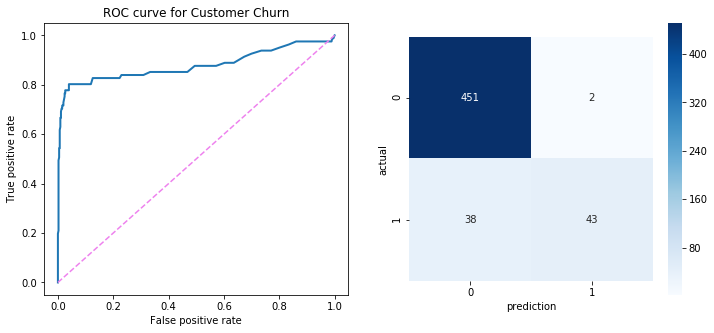

In [41]:
plt.figure(figsize=(12, 5))
fpr, tpr, thresholds = roc_curve(y_test, cv.predict_proba(X_test)[:,1])
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Customer Churn');
print("ROC AUC score = ", roc_auc_score(y_test, cv.predict_proba(X_test)[:,1]))

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, cv.predict(X_test)), cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
plt.xlabel('prediction')
plt.ylabel('actual');

In [42]:
steps = [('SMOTE', SMOTE(sampling_strategy='minority', random_state=42)),
         ('scaler', StandardScaler()),
         ('RF', RandomForestClassifier(n_estimators=400, random_state=42))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.9325842696629213
Accuracy Test: 0.9325842696629213
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       453
           1       0.83      0.70      0.76        81

    accuracy                           0.93       534
   macro avg       0.89      0.84      0.86       534
weighted avg       0.93      0.93      0.93       534



In [43]:
categoricals = get_categoricals(X_train)

steps = [('SMOTENC', SMOTENC(categoricals, sampling_strategy='minority', random_state=42)),
         ('scaler', StandardScaler()),
         ('RF', RandomForestClassifier(n_estimators=400, random_state=42))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.9101123595505618
Accuracy Test: 0.9101123595505618
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       453
           1       0.75      0.62      0.68        81

    accuracy                           0.91       534
   macro avg       0.84      0.79      0.81       534
weighted avg       0.91      0.91      0.91       534



In [44]:
xg = XGBClassifier(n_estimators=300)

In [52]:
xg = XGBClassifier(n_estimators=200, random_state=42)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(xg.score(X_test, y_test)))
print("Accuracy Test: {}".format(xg.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.9438202247191011
Accuracy Test: 0.9438202247191011
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       453
           1       0.92      0.69      0.79        81

    accuracy                           0.94       534
   macro avg       0.93      0.84      0.88       534
weighted avg       0.94      0.94      0.94       534



ROC AUC score =  0.8719374267571471


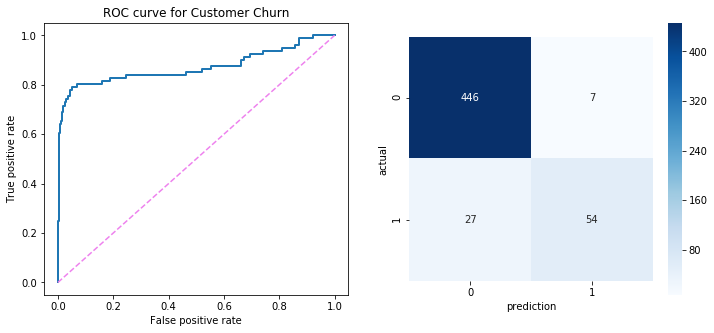

In [46]:
plt.figure(figsize=(12, 5))
fpr, tpr, thresholds = roc_curve(y_test, xg.predict_proba(X_test)[:,1])
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Customer Churn');
print("ROC AUC score = ", roc_auc_score(y_test, xg.predict_proba(X_test)[:,1]))

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, xg.predict(X_test)), cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
plt.xlabel('prediction')
plt.ylabel('actual');

In [64]:
steps = [('XG', XGBClassifier(random_state=42))]

pipeline = Pipeline(steps)

parameters = {'XG__n_estimators' : [200, 225, 250, 275],
              'XG__max_depth' : [6]}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(cv.score(X_test, y_test)))
print("Accuracy Test: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy Train: 0.9644194756554307
Accuracy Test: 0.9644194756554307
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       456
           1       0.93      0.82      0.87        78

    accuracy                           0.96       534
   macro avg       0.95      0.90      0.93       534
weighted avg       0.96      0.96      0.96       534

Tuned Model Parameters: {'XG__max_depth': 6, 'XG__n_estimators': 250}


### Best Results are XGBoost, 250 learners, max depth of 6  
Accuracy Train: 0.9644194756554307  
Accuracy Test: 0.9644194756554307  
              precision    recall  f1-score   support  

           0       0.97      0.99      0.98       456  
           1       0.93      0.82      0.87        78  

    accuracy                           0.96       534  
   macro avg       0.95      0.90      0.93       534  
weighted avg       0.96      0.96      0.96       534  
  
Tuned Model Parameters: {'XG__max_depth': 6, 'XG__n_estimators': 250}  

ROC AUC score =  0.9070793972109762


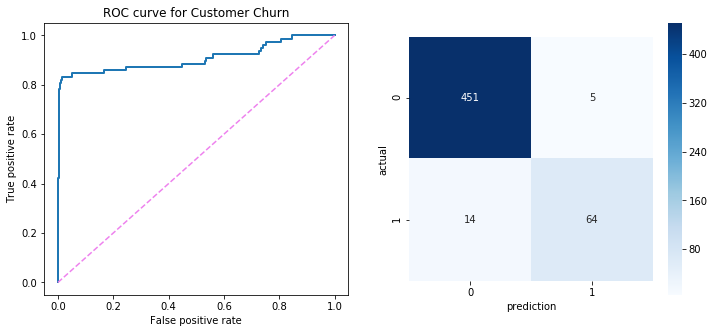

In [65]:
plt.figure(figsize=(12, 5))
fpr, tpr, thresholds = roc_curve(y_test, cv.predict_proba(X_test)[:,1])
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Customer Churn');
print("ROC AUC score = ", roc_auc_score(y_test, cv.predict_proba(X_test)[:,1]))

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, cv.predict(X_test)), cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
plt.xlabel('prediction')
plt.ylabel('actual');

In [74]:
xg = XGBClassifier(random_state=42, n_estimators=250, max_depth=6)
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [75]:
xg.feature_importances_

array([0.02069131, 0.0977449 , 0.13723789, 0.02202822, 0.07283982,
       0.01964732, 0.        , 0.04700342, 0.02066724, 0.        ,
       0.0273985 , 0.02248895, 0.        , 0.04370305, 0.08167168,
       0.        , 0.11381047, 0.        , 0.        , 0.        ,
       0.        , 0.01013246, 0.        , 0.02778807, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01309831,
       0.00763046, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01152414, 0.02289235, 0.        , 0.01422061,
       0.        , 0.        , 0.02404474, 0.        , 0.        ,
       0.        , 0.02478049, 0.        , 0.00908154, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01991938,
       0.        , 0.        , 0.01610776, 0.        , 0.01809745,
       0.        , 0.        , 0.01731904, 0.01820232, 0.01822804],
      dtype=float32)

In [86]:
def get_feature_names(dataset, importances):
    important_features = []
    feature_values = []
    for idx, val in enumerate(importances):
        if val > 0.01:
            important_features.append(True)
        else:
            important_features.append(False)
        feature_values.append(val)
    important_features = np.array(important_features)
    feature_names = dataset.columns[important_features]
    feature_values = np.array(feature_values)[important_features]
    value_sort = np.argsort(feature_values)
    
    return (feature_names[value_sort], feature_values[value_sort])
        

In [87]:
get_feature_names(X_train, xg.feature_importances_)

(Index(['CO', 'MS', 'LA', 'ND', 'VT', '408', 'WI', '415', '510',
        'total day calls', 'TX', 'total eve calls', 'account length',
        'number vmail messages', 'total night calls', 'MT', 'NJ', 'OH',
        'total night minutes', 'DC', 'total intl minutes', 'total eve minutes',
        'total day minutes', 'total intl calls', 'international plan',
        'customer service calls', 'voice mail plan'],
       dtype='object'),
 array([0.01013246, 0.01152414, 0.01309831, 0.01422061, 0.01610776,
        0.01731904, 0.01809745, 0.01820232, 0.01822804, 0.01964732,
        0.01991938, 0.02066724, 0.02069131, 0.02202822, 0.02248895,
        0.02289235, 0.02404474, 0.02478049, 0.0273985 , 0.02778807,
        0.04370305, 0.04700342, 0.07283982, 0.08167168, 0.0977449 ,
        0.11381047, 0.13723789], dtype=float32))